In [1]:
# -*- coding: utf8 -*-
# This is a report using the data from IQAASL.
# IQAASL was a project funded by the Swiss Confederation
# It produces a summary of litter survey results for a defined region.
# These charts serve as the models for the development of plagespropres.ch
# The data is gathered by volunteers.
# Please remember all copyrights apply, please give credit when applicable
# The repo is maintained by the community effective January 01, 2022
# There is ample opportunity to contribute, learn and teach
# contact dev@hammerdirt.ch

# Dies ist ein Bericht, der die Daten von IQAASL verwendet.
# IQAASL war ein von der Schweizerischen Eidgenossenschaft finanziertes Projekt.
# Es erstellt eine Zusammenfassung der Ergebnisse der Littering-Umfrage für eine bestimmte Region.
# Diese Grafiken dienten als Vorlage für die Entwicklung von plagespropres.ch.
# Die Daten werden von Freiwilligen gesammelt.
# Bitte denken Sie daran, dass alle Copyrights gelten, bitte geben Sie den Namen an, wenn zutreffend.
# Das Repo wird ab dem 01. Januar 2022 von der Community gepflegt.
# Es gibt reichlich Gelegenheit, etwas beizutragen, zu lernen und zu lehren.
# Kontakt dev@hammerdirt.ch

# Il s'agit d'un rapport utilisant les données de IQAASL.
# IQAASL était un projet financé par la Confédération suisse.
# Il produit un résumé des résultats de l'enquête sur les déchets sauvages pour une région définie.
# Ces tableaux ont servi de modèles pour le développement de plagespropres.ch
# Les données sont recueillies par des bénévoles.
# N'oubliez pas que tous les droits d'auteur s'appliquent, veuillez indiquer le crédit lorsque cela est possible.
# Le dépôt est maintenu par la communauté à partir du 1er janvier 2022.
# Il y a de nombreuses possibilités de contribuer, d'apprendre et d'enseigner.
# contact dev@hammerdirt.ch

# sys, file and nav packages:
import datetime as dt
import locale

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import seaborn as sns

# home brew utitilties
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# set the locale to the language desired
# the locale is set back to to original at the the end of the script
loc = locale.getlocale()
lang =  "de_DE.utf8"
locale.setlocale(locale.LC_ALL, lang)

# the date is in iso standard:
d = "%Y-%m-%d"

# it gets changed to german format
g = "%d.%m.%Y"


# set some parameters:
start_date = "01.03.2020"
end_date ="31.09.2021"
start_end = [start_date, end_date]
a_fail_rate = 50
reporting_unit = 100
unit_label = "p/100m"

# colors for gradients, tables and charts
cmap2 = ck.cmap2
colors_palette = ck.colors_palette
a_color = "dodgerblue"

# the search term for the survey area
bassin_name = "les-alpes"

# the names for the survey area and the cumulative data
level_names = ["Die Alpen", "Alle Erhebungsgebiete"]

# common aggregations
agg_pcs_quantity = {unit_label:"sum", "quantity":"sum"}
agg_pcs_median = {unit_label:"median", "quantity":"sum"}

# alpes data:
aldata = pd.read_csv("resources/checked_alpes_survey_data.csv")

# survey data lakes and rives
sdata = pd.read_csv("resources/checked_sdata_eos_2020_21.csv")

# location and object data
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")

# the dimensional data from each survey
dfDims = pd.read_csv("resources/alpes_dims.csv")

# remove the prefix from the beach names
alpb = dfBeaches[dfBeaches.river_bassin == "les-alpes"].copy()

# removing the prefix from the location names in the location data
alpb["slug"] = alpb.slug.apply(lambda x: x.replace("clean-up-tour-", ""))

# put that back together
dfBeaches = pd.concat([alpb, dfBeaches[dfBeaches.river_bassin != "les-alpes"]])

dfBeaches.set_index("slug", inplace=True)

# index the code data
dfCodes.set_index("code", inplace=True)

# language specific
# importing german code descriptions
de_codes = pd.read_csv("resources/codes_german_Version_1.csv")
de_codes.set_index("code", inplace=True)

# apply the new language to the codes and materials:
for x in dfCodes.index:
    dfCodes.loc[x, "description"] = de_codes.loc[x, "german"]

# there are long code descriptions that may need to be shortened
codes_to_change = [
    ["G704", "description", "Seilbahnbürste"],
    ["Gfrags", "description", "Fragmentierte Kunststoffstücke"],
    ["G30", "description", "Imbiss-Verpackungen"],
    ["G124", "description", "Kunststoff- oder Schaumstoffprodukte"],
    ["G87", "description", "Abdeckklebeband/Verpackungsklebeband"],
    ["G178","description","Flaschenverschlüsse aus Metall"],
    ["G3","description","Einkaufstaschen, Shoppingtaschen"],
    ["G33", "description", "Einwegartikel; Tassen/Becher & Deckel"],
    ["G31", "description", "Schleckstengel, Stengel von Lutscher"]
]

for x in codes_to_change:
    dfCodes = sut.shorten_the_value(x, dfCodes)

# the material was mislabled by the surveyor
dfCodes.loc["G708", "material"] = "Metal"

dfCodes["material"] = dfCodes.material.map(lambda x: sut.mat_ge[x]) 

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code materials
code_material_map = dfCodes.material

(lesalpesde)=

# Die Alpen und der Jura

Die Alpen und der Jura (les Alpes) sind Erhebungsgebiete, die von der Summit Foundation eingerichtet und verwaltet werden. Die Summit Foundation führt seit vielen Jahren [clean up events](https://www.summit-foundation.org/en/) in den Schweizer Alpen durch. Zu den Veranstaltungen im Jahr 2021 gehörten auch eine Reihe von Datenerhebungen zu Abfallobjekten, die parallel zu den regelmäßig stattfindenden Veranstaltungen durchgeführt wurden. Die Summit Foundation hatte zwei Fragen in Bezug auf IQAASL: 

1. Wie kann die Datenerfassung in das aktuelle Geschäftsmodell integriert werden? 
2. Wie sind die Datenerhebungen auf den Bergpfaden im Vergleich zu denen am Wasser?

Der Zweck von Aufräumaktionen ist es, so viel Abfallobjekte wie möglich aus einem bestimmten Gebiet zu entfernen. Wie viel entfernt werden kann, hängt von den zur Verfügung stehenden Ressourcen ab. Eine Datenerhebung über Abfallobjekte dient der Identifizierung und Zählung der Objekte in einem bestimmten Gebiet. In diesem Sinne ist eine Aufräumaktion eine Annäherung an das Abfallproblem aus der Perspektive der Abschwächung oder Milderung, und Datenerhebungen liefern die notwendigen Daten zur Verbesserung der Prävention.  

## Methoden der Datenerhebungen 

Insgesamt wurden zwanzig Datenerhebungen zu Abfallobjekten von der Summit Foundation durchgeführt. Ursprünglich wurden zwei Methoden ausgewählt: 

1. Datenerhebungen für eine bestimmte Entfernung und Breite eines Streckenabschnitts
2. Datenerhebungen der Anlagen bei der Ankunft/Abfahrt der Liftlinie 

Das Verfahren der Datenerhebungen bleibt unter beiden Bedingungen gleich: 

1. Ein Abschnitt eines Weges oder eine Fläche wird gemessen 
2. Alle sichtbaren Schadstoffe werden entfernt, gezählt und klassifizier
3. Die Ergebnisse und Abmessungen werden aufgezeichnet 

Der Unterschied zwischen den beiden Methoden liegt in der Art und Weise, wie die Grenzen des Vermessungsgebiets festgelegt werden. Wenn ein Weg benutzt wird, werden die Grenzen des Vermessungsgebiets durch den Weg selbst festgelegt, nicht durch die Person, die die Datenerhebung ausführt. Im Sommer sind die Barrieren und Schilder, die die Bereiche für die Liftlinien markieren, alle entfernt worden, so dass es für die Person, die die Datenerhebung ausführt, schwierig ist, die korrekten Grenzen genau zu bestimmen.  

## Kumulierte Gesamtzahlen für das Datenerhebungsgebiet

*Karte des Erhebungsgebiets Les Alpes, Sommersäuberungstour 2021*

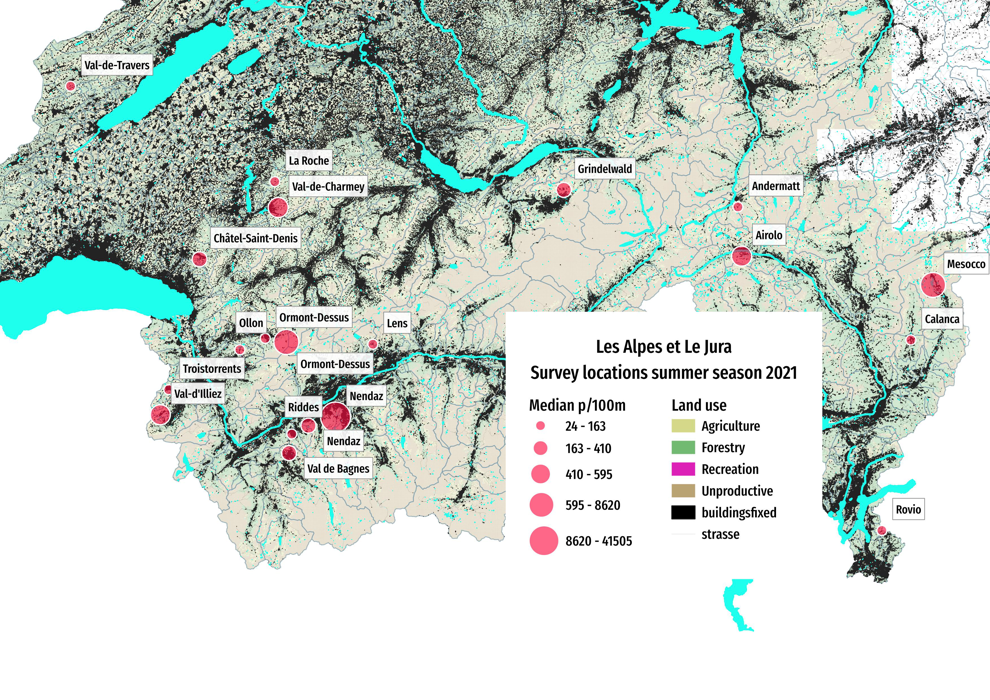

In [2]:
sut.display_image_ipython("resources/maps/survey_areas/alpesvalaisannes.jpeg")

In [3]:
# define the final survey data set here:
# combined the alps and the lakes and rivers data
predata = pd.concat([aldata, sdata])

# remove the prefix from the location names
predata["location"] = predata["location"].map(lambda x: sut.get_rid_of_ix(x, prefix="clean-up-tour-"))

# language specific
predata.rename(columns=sut.luse_ge, inplace=True)
predata["groupname"] = predata.groupname.map(lambda x: sut.group_names_de[x])

# assign loc_date and make date stamp
predata["loc_date"] = list(zip(predata.location, predata["date"]))
predata["date"] = pd.to_datetime(predata["date"])
predata["date"] = predata["date"].dt.strftime(g)
predata["date"] = pd.to_datetime(predata["date"], format=g)
 
# remove prefixes from the alps location names in the surveys
fd = predata[predata.river_bassin == "les-alpes"].copy()
sd = predata[predata.river_bassin != "les-alpes"]

# merge it back in with the rest
a_data = pd.concat([fd, sd])

# scale the streets to kilometers
a_data["streets"] = a_data.streets.astype("int")

# the totals for each survey and the locations in the feature data
fd_dt=fd.groupby(["loc_date", "date","month", "location"], as_index=False).agg(agg_pcs_quantity)

# survey totals
dt_all = a_data.groupby(["loc_date","location","river_bassin", "date"], as_index=False).agg(agg_pcs_quantity)

# the unique locations and samples
t = {"samples":fd.loc_date.nunique(),
     "locations":fd.location.unique(),
     "nlocations":fd.location.nunique(),
     "fdtotalq": fd.quantity.sum()
    }

# gather the municpalities and the population:
fd_pop_map = dfBeaches.loc[fd.location.unique()][["city","population"]].copy()
fd_pop_map.drop_duplicates(inplace=True)
fd_pop_map.set_index("city", drop=True, inplace=True)

t.update({"nmunis":len(fd_pop_map.index)})

# fancy print to jupyter:
obj_string = "{:,}".format(t["fdtotalq"])
surv_string = "{:,}".format(t["samples"])
pop_string = "{:,}".format(int(fd_pop_map.sum()[0]))

date_quantity_context = f"Zwischen {start_date[3:]} und {end_date[3:]}, wurden im Laufe von {surv_string} Datenerhebungen an {t['samples']} "
geo_context = f"verschiedenen Orten in {t['nmunis']} Gemeinden und einer Gesamtbevölkerung von {pop_string}. Einwohnern insgesamt {t['fdtotalq']} Objekte entfernt und identifiziert."
munis_joined = ", ".join(sorted(fd_pop_map.index))

# put that all together:
lake_string = F"""
{date_quantity_context} {geo_context }

\n\n >{munis_joined}"""

In [4]:
md(lake_string)


Zwischen 03.2020 und 09.2021, wurden im Laufe von 20 Datenerhebungen an 20  verschiedenen Orten in 18 Gemeinden und einer Gesamtbevölkerung von 70,606. Einwohnern insgesamt 7776 Objekte entfernt und identifiziert.



 >Airolo, Andermatt, Calanca, Châtel-Saint-Denis, Grindelwald, La Roche, Lens, Mesocco, Nendaz, Ollon, Ormont-Dessus, Riddes, Rovio, Troistorrents, Val de Bagnes, Val-d'Illiez, Val-de-Charmey, Val-de-Travers

### Gesamtzahlen der Datenerhebungen

*__Unten:__ Die aggregierten Ergebnisse der Abfallerhebungen. Dies beinhaltet nicht die Gesamtzahlen der Ereignisse, siehe nächster Abschnitt.*

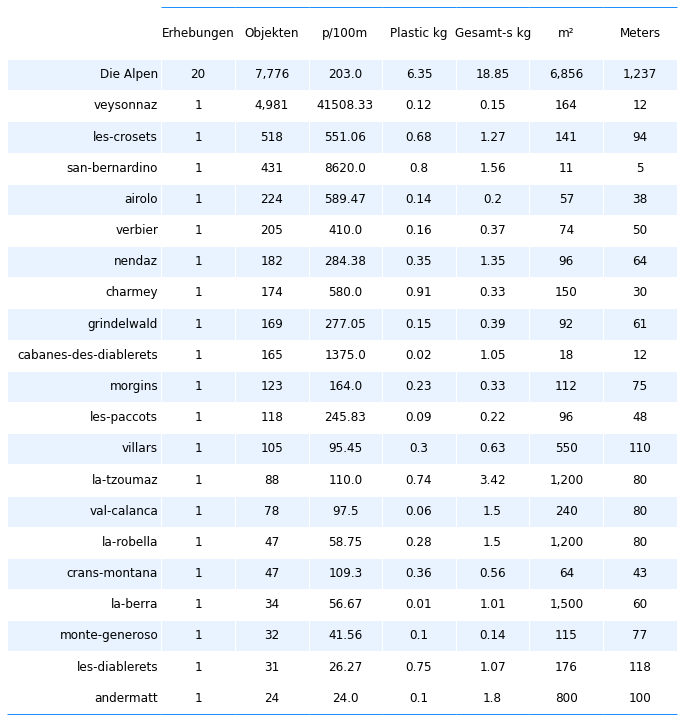

In [5]:
# gather the dimensional data for the time frame from dfDims
# match records to survey data
# the dimensional data, remove prefix and reassemble
fd_dims = dfDims[(dfDims.river_bassin == "les-alpes")&(dfDims.date >= start_date)&(dfDims.date <= end_date)].copy()
fd_dims["location"] = fd_dims.location.apply(lambda x: x.replace("clean-up-tour-", ""))
fd_dims["loc_date"] = list(zip(fd_dims.location, fd_dims.date))

# map the daily totals to the survey dimensions
q_map = fd_dt[["loc_date", "quantity"]].set_index("loc_date").quantity
fd_dims["quantity"] = fd_dims.loc_date.map(lambda x: q_map.loc[[x]].values[0])

# get the pieces per meter
fd_dims[unit_label] = ((fd_dims.quantity/fd_dims["length"])*reporting_unit).round(2)

# make a loc_date column 
fd_dims["loc_date"] = list(zip(fd_dims.location, fd_dims.date))

# get the cumlaitve values for each location:
agg_for_table = {
    "quantity":"sum",
    unit_label:"mean",
    "total_w":"sum",
    "mac_plast_w":"sum",
    "mic_plas_w":"sum",
    "area":"sum",
    "length":"sum",
    "num_parts_other":"sum",
    "num_parts_staff":"sum",
    "time_minutes":"sum"
    
}

# the table of cumulative values
dims_table = fd_dims.groupby(["location"]).agg(agg_for_table )

# collect the number of samples from the survey total data:
for name in dims_table.index:
    dims_table.loc[name, "samples"] = fd_dt[fd_dt.location == name].loc_date.nunique()

# get the sum of all the samples
dims_table.loc[level_names[0]]= dims_table.sum(numeric_only=True, axis=0)

# take the median pcs_m of all the samples
dims_table.loc[level_names[0], unit_label] = fd_dt.groupby(["location"])[unit_label].sum().median()

# for display
dims_table.sort_values(by=["quantity"], ascending=False, inplace=True)

# german column names for the dimensional data table
new_col_names={    
    "samples":"Erhebungen",
    "quantity":"Objekten",
    "total_w":"Gesamt-e kg",
    "mac_plast_w":"Plastic kg", 
    "mic_plas_w":"Gesamt-s kg",
    "area": "m²",
    "length":"Meters", 
    "num_parts_other": "Teilnehmer", 
    "num_parts_staff": "Mitarbeiter",
    "time_minutes":"Std"
}

# order the columns
dims_table.rename(columns=new_col_names, inplace=True)

# kilos, these weights are recorded in grams
kilos = ["Plastic kg", "Gesamt-s kg"]
dims_table[kilos] = (dims_table[kilos]/1000).round(2)

# numerical type and rounding
tints = ["Erhebungen","Gesamt-e kg", "m²", "Meters", "Objekten", "Mitarbeiter", "Teilnehmer"]
twodec = [unit_label]

# apply formatting
dims_table[tints] = dims_table[tints].astype("int")
dims_table[twodec] = dims_table[twodec].round(2)
dims_table["Std"] = (dims_table["Std"]/60).round(1)

# apply string formatting
dims_table.reset_index(inplace=True)
table_one = dims_table[["location","Erhebungen", "Objekten", unit_label,"Plastic kg", "Gesamt-s kg", "m²", "Meters"]].copy()
commas = ["Erhebungen", "Objekten",  "m²", "Meters", unit_label]
table_one.loc[:,commas[:-1]] = table_one.loc[:,commas].applymap(lambda x: F"{x:,}")

# make table
fig, ax = plt.subplots(figsize=(12, 13))
sut.hide_spines_ticks_grids(ax)
a_table = sut.make_a_table(ax,table_one.values , colLabels=table_one.columns, colWidths=[.23, *[.11]*7], bbox=[0, 0, 1, 1], bottom_row=True)
a_table.get_celld()[(0,0)].get_text().set_text(" ")
plt.show()

### Gesamtzahlen der Veranstaltung

*__Unten:__ Die Gesamtmenge des gesammelten Mülls in Kilogramm, die Anzahl der Teilnehmer und des Personals sowie die Zeit, die für die Durchführung der Umfrage benötigt wurde.*

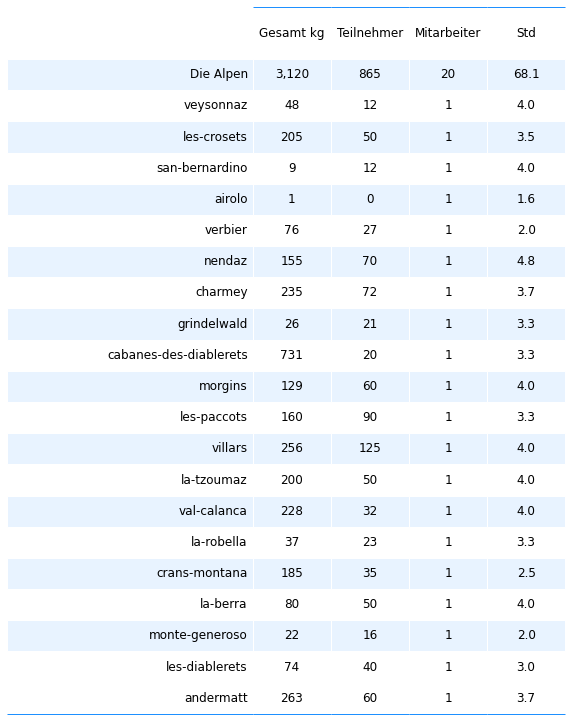

In [6]:
# table two event totals
table_two = dims_table[["location","Gesamt-e kg", "Teilnehmer", "Mitarbeiter","Std"]].copy()
table_two["Gesamt kg"] = table_two["Gesamt-e kg"].map(lambda x: F"{x:,}")
table_two = table_two[["location", "Gesamt kg", "Teilnehmer", "Mitarbeiter", "Std"]]

# make a table
fig, axs = plt.subplots(figsize=(len(table_two.columns)*2,13))
sut.hide_spines_ticks_grids(axs)

a_table = sut.make_a_table(axs, table_two.values, colLabels=table_two.columns, colWidths=[.44, *[.14]*4])
a_table.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Landnutzungsprofil der Erhebungsorte 

Die Landnutzung wird als Prozentsatz der Gesamtfläche angegeben, die jeder Landnutzungskategorie innerhalb eines Radius von 1500 m um den Erhebungsort zugeordnet wird.      

* \% auf Gebäude entfallen 
* \% der landwirtschaftlich genutzten Fläche 
* \% der Fläche, die der Forstwirtschaft zugeschrieben wird 
* \% der Fläche, die der Erholung vorbehalten ist 

Straßen werden als Gesamtzahl der Straßenkilometer im Umkreis von 1500 m angegeben. Intersects ist ebenfalls eine ordinale Rangfolge der Anzahl der Flüsse/Kanäle, die einen See innerhalb von 1500 m um den Erhebungsort herum durchqueren.  

Das Verhältnis der Anzahl der Proben bei unterschiedlichen Landnutzungsprofilen gibt einen Hinweis auf die ökologischen und wirtschaftlichen Bedingungen der Untersuchungsstandorte. 

Für weitere Informationen [_Landnutzungsprofil_](luseprofilede) für weitere Details.

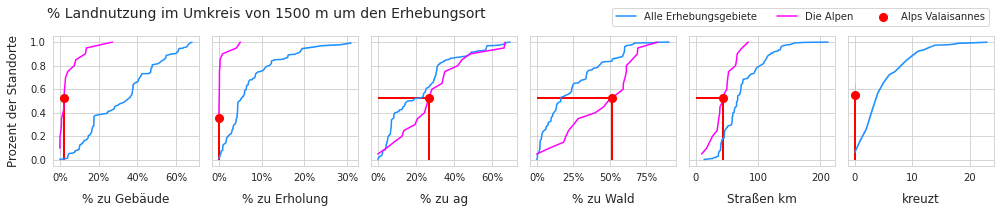

In [7]:
# explanatory variables:
luse_exp = list(sut.luse_ge.values())

# columns needed
use_these_cols = ["loc_date" ,*luse_exp,  "groupname","code"]

# the land use data from all other locations
datax = sd.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

# work off the copy
data = fd.groupby(use_these_cols[:-2], as_index=False).agg(agg_pcs_quantity)

sns.set_style("whitegrid")

fig, axs = plt.subplots(1,len(luse_exp), figsize=(14,3), sharey=True)

for i, n in enumerate(luse_exp):    
    
    ax=axs[i]    
    # get the empirical distribution of the independent variable
    all_surveys = ECDF(datax[n].values)
    les_alpes = ECDF(data[n].values)
        
    # plot that
    sns.lineplot(x=all_surveys.x, y=all_surveys.y, ax=ax, color=a_color, label=level_names[1])
    # plot that
    sns.lineplot(x=les_alpes.x, y=les_alpes.y, ax=ax, color="magenta", label=level_names[0])
    the_median = data[n].median()
    
    # get its position reference the surrounding survey area
    a = (stats.percentileofscore(les_alpes.x, the_median))/100
    
    # plot the median and drop horzontal and vertical lines
    ax.scatter([the_median], a, color="red",s=50, linewidth=2, zorder=100, label="Alps Valaisannes")
    ax.vlines(x=the_median, ymin=0, ymax=a, color="red", linewidth=2)
    ax.hlines(xmax=the_median, xmin=0, y=a, color="red", linewidth=2)
    
    # save the handels and labels but remove them from the ax    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    # format the % of total on the xaxis:
    if i <= 3:
        if i == 0:            
            ax.set_ylabel("Prozent der Standorte", **ck.xlab_k)
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0, 0, "%"))        
    else:
        pass
    ax.set_xlabel(n, **ck.xlab_k)

plt.suptitle("% Landnutzung im Umkreis von 1500 m um den Erhebungsort", ha="left", x=0.05, y=.97, fontsize=14)
plt.tight_layout()
fig.legend(handles, labels,bbox_to_anchor=(.99, .99), loc="upper right",ncol=3)      
plt.show()

*__Oben:__ Die Orte im Erhebungsgebiet der Alpen wiesen einen höheren Prozentsatz an Flächen auf, die der Forst- und Landwirtschaft zugeordnet wurden, und einen geringeren Prozentsatz, der Gebäuden und Freizeiteinrichtungen zugeordnet wurde, als die Orte im IQAASL.* 

Die aggregierten Ergebnisse zeigen den Unterschied zwischen den beiden Erhebungsmethoden. Die drei Standorte mit dem höchsten p/100m haben auch die kürzeste Länge. Im Fall von Cabanes-des-Diablerets ist der Meter² gleich der Länge, was darauf hindeutet, dass ein kleiner Bereich um eine Struktur oder ein Gebäude herum vermessen wurde. Veysonnaz befindet sich am Ende einer Skiliftlinie.
    
Der Unterschied in den Methoden führt zu deutlich unterschiedlichen Ergebnissen. Außerdem wurden diese beiden Orte aufgrund der früheren Erfahrungen der Person, die die Datenerhebung ausführt, speziell für die Bestandsaufnahme ausgewählt. Aufgrund der unterschiedlichen Dimensionen und Methoden werden die Datenerhebungen Ergebnisse aus Veysonnaz, San-Beranardino und Cabanes-des-Diablerets in der weiteren Analyse nicht berücksichtigt.

## Verteilung der Datenerhebungen Ergebnisse

In [8]:
remove = ["veysonnaz", "cabanes-des-diablerets", "san-bernardino"]

# the feature data without the three locations
wt_data = fd[~fd.location.isin(remove)].copy()

# all the data without the three locations
a_data = a_data[~a_data.location.isin(remove)]

wt_dt =fd_dt[~fd_dt.location.isin(remove)].copy()

nvsn = wt_dt.location.unique()

# make a df of survey totals with date as index
# the daily survey totals of all the data for the survey period
a_dt = a_data.groupby(["loc_date", "date","location"], as_index=False).agg(agg_pcs_quantity)

# only the surveys from all other survey areas
dts_date = a_dt[(~a_dt.location.isin([*nvsn, *remove]))].copy()

# figure caption
chart_notes = F"""
*__Links:__ Alle Proben Seen/Flüsse und Wanderwege, {start_date[:7]} bis {end_date[:7]}, n={a_data.loc_date.nunique()}. __Rechts:__ Verteilung der Datenerhebungen Ergebnisse, Ausreißer entfernt.*  
"""
md(chart_notes )


*__Links:__ Alle Proben Seen/Flüsse und Wanderwege, 01.03.2 bis 31.09.2, n=403. __Rechts:__ Verteilung der Datenerhebungen Ergebnisse, Ausreißer entfernt.*  


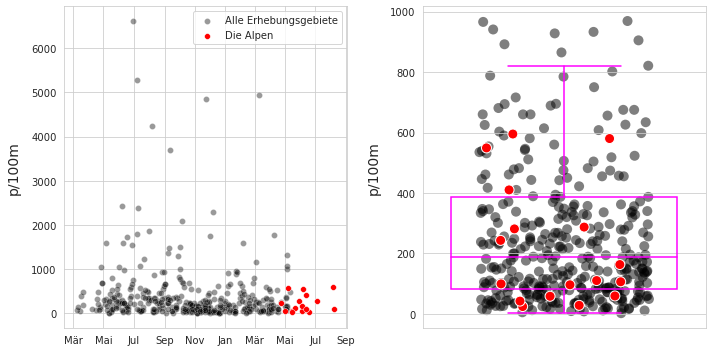

In [9]:
# months locator, can be confusing
# https://matplotlib.org/stable/api/dates_api.html
months_fmt = mdates.DateFormatter("%b")

fig, axs = plt.subplots(1,2, figsize=(10,5))

ax = axs[0]

# there is a big value in here, that should be seen.
sns.scatterplot(data=dts_date, x="date", y=unit_label, color="black", alpha=0.4, label=level_names[1], ax=ax)
sns.scatterplot(data=wt_dt, x="date", y=unit_label, color="red", s=34, ec="white",label=level_names[0], ax=ax)

ax.set_xlabel("")
ax.set_ylabel(unit_label, **ck.xlab_k14)

# ax.tick_params(axis="x", which="both", bottom=False )
ax.xaxis.set_major_formatter(months_fmt)

axtwo = axs[1]

box_props = {
    "boxprops":{"facecolor":"none", "edgecolor":"magenta"},
    "medianprops":{"color":"magenta"},
    "whiskerprops":{"color":"magenta"},
    "capprops":{"color":"magenta"}
}
sns.boxplot(data=dts_date, y=unit_label, color="black",  ax=axtwo, showfliers=False, **box_props, zorder=1)
sns.stripplot(data=dts_date[dts_date[unit_label] <= 1000], s=10, y=unit_label, color="black", ax=axtwo, alpha=0.5, jitter=0.3, zorder=0)
sns.stripplot(data=wt_dt, y=unit_label, color="red", s=10, ec="white",linewidth=1, ax=axtwo, jitter=0.3, zorder=2)

axtwo.set_xlabel("")
axtwo.set_ylabel(unit_label, **ck.xlab_k14)

axtwo.tick_params(which="both", axis="x", bottom=False)

plt.tight_layout()
plt.show()
plt.close()

### Zusammenfassende Daten und Materialtypen

*__Links:__ Wanderwege Zusammenfassung der Datenerhebungen. __Rechts:__ Materialart der Wanderwege und Prozentsatz der Gesamtzahl.*

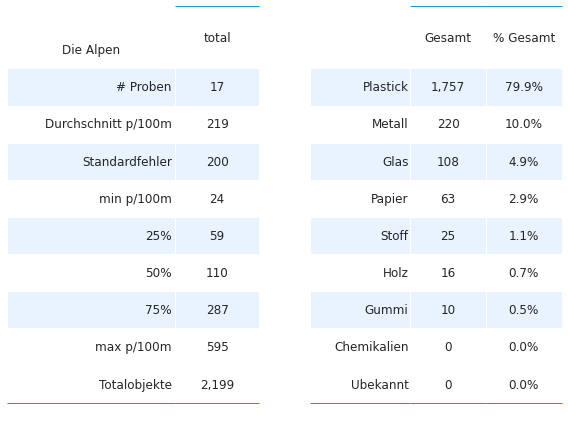

In [10]:
# get the basic statistics from pd.describe
cs = wt_dt[unit_label].describe().round(2)

# add project totals
cs["total objects"] = fd[~fd.location.isin(remove)].quantity.sum()

# change the names
csx = sut.change_series_index_labels(cs, sut.create_summary_table_index(unit_label, lang="DE"))

# format the text
combined_summary = sut.fmt_combined_summary(csx, nf=[])

# the material totals
code_totals = sut.the_aggregated_object_values(wt_data, agg=agg_pcs_median, description_map=code_description_map, material_map=code_material_map)    
code_totals.sort_values(by="quantity", ascending=False)

fd_mat_totals = sut.the_ratio_object_to_total(code_totals)

fd_mat_totals = sut.fmt_pct_of_total(fd_mat_totals)
fd_mat_totals = sut.make_string_format(fd_mat_totals)

# applly new column names for printing
cols_to_use = {"material":"Material","quantity":"Quantity", "% of total":"% of total"}
fd_mat_t = fd_mat_totals[cols_to_use.keys()].values

# make tables
fig, axs = plt.subplots(1,2, figsize=(8,6))

# summary table
# names for the table columns
a_col = [level_names[0], "total"]

axone = axs[0]
sut.hide_spines_ticks_grids(axone)

table_two = sut.make_a_table(axone, combined_summary,  colLabels=a_col, colWidths=[.5,.25,.25],  bbox=[0,0,1,1], **{"loc":"lower center"})
# table_two.get_celld()[(0,0)].get_text().set_text(" ")

# material table
axtwo = axs[1]
axtwo.set_xlabel(" ")
sut.hide_spines_ticks_grids(axtwo)

# column names for display
cols_to_use = {"material":"Material","quantity":"Gesamt", "% of total":"% Gesamt"}

table_three = sut.make_a_table(axtwo, fd_mat_t,  colLabels=list(cols_to_use.values()), colWidths=[.4, .3,.3],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_three.get_celld()[(0,0)].get_text().set_text(" ")

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

### Die häufigsten Obkekte

Die häufigsten Objekte sind __die zehn häufigsten Objekte nach Anzahl der Funde__ UND/ODER __jedes Objekt, das in mindestens 50% aller Datenerhebungen identifiziert wurde__. 

In [11]:
# code totals for les Alps not including veysonnaz
code_totals.rename(columns={"groupname":"utility"}, inplace=True)

# objects with a fail rate of > 50% in the survey area
most_common = code_totals[code_totals["fail rate"] >= 50].sort_values(by="quantity", ascending=False)

# the top ten by quantity
most_abundant = code_totals.sort_values(by="quantity", ascending=False)[:10]

# merge with most_common and drop duplicates
m_common = pd.concat([most_abundant, most_common]).drop_duplicates()

# get percent of total
m_common_percent_of_total = m_common.quantity.sum()/code_totals.quantity.sum()

# format values for table
m_common["item"] = m_common.index.map(lambda x: code_description_map.loc[x])
m_common["% of total"] = m_common["% of total"].map(lambda x: F"{x}%")
m_common["quantity"] = m_common.quantity.map(lambda x: "{:,}".format(x))
m_common["fail rate"] = m_common["fail rate"].map(lambda x: F"{x}%")
m_common[unit_label] = m_common[unit_label].map(lambda x: F"{np.ceil(x)}")

# final table wt_data
cols_to_use = {"item":"Objekt","quantity":"Gesamt", "% of total":"% Gesamt", "fail rate":"Ausfallsrate", unit_label:unit_label}
walking_trails = m_common[cols_to_use.keys()].values

# figure caption
rb_string = F"""
*__Unten:__ Häufigste Objekte auf Wanderwegen: Fail-Pass Rate >/= 50% und/oder Top Ten nach Anzahl. Zusammengenommen stellen die
zehn häufigsten Objekte {int(m_common_percent_of_total*100)}% aller gefundenen Objekte dar,{unit_label}: Medianwert der Erhebung.*
"""
md(rb_string)


*__Unten:__ Häufigste Objekte auf Wanderwegen: Fail-Pass Rate >/= 50% und/oder Top Ten nach Anzahl. Zusammengenommen stellen die
zehn häufigsten Objekte 69% aller gefundenen Objekte dar,p/100m: Medianwert der Erhebung.*


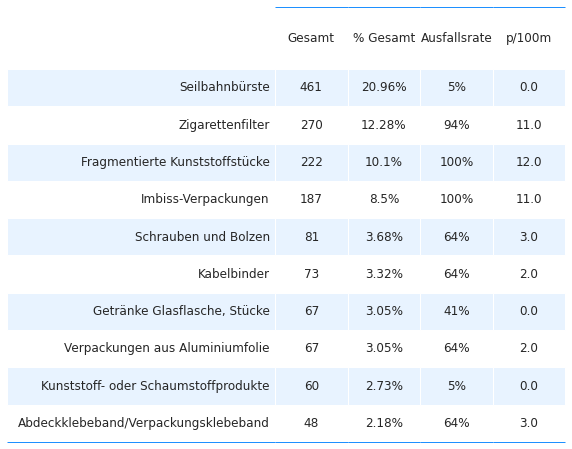

In [12]:
fig, axs = plt.subplots(figsize=(10,len(m_common)*.8))

sut.hide_spines_ticks_grids(axs)

table_three = sut.make_a_table(axs, walking_trails,  colLabels=list(cols_to_use.values()), colWidths=[.48, .13,.13,.13, .13],  bbox=[0,0,1,1], **{"loc":"lower center"})
table_three.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Häufigste Objektergebnisse nach Erhebungsort.

*__Unten:__ Wanderwege häufigste Objekte: Median p/100m.*

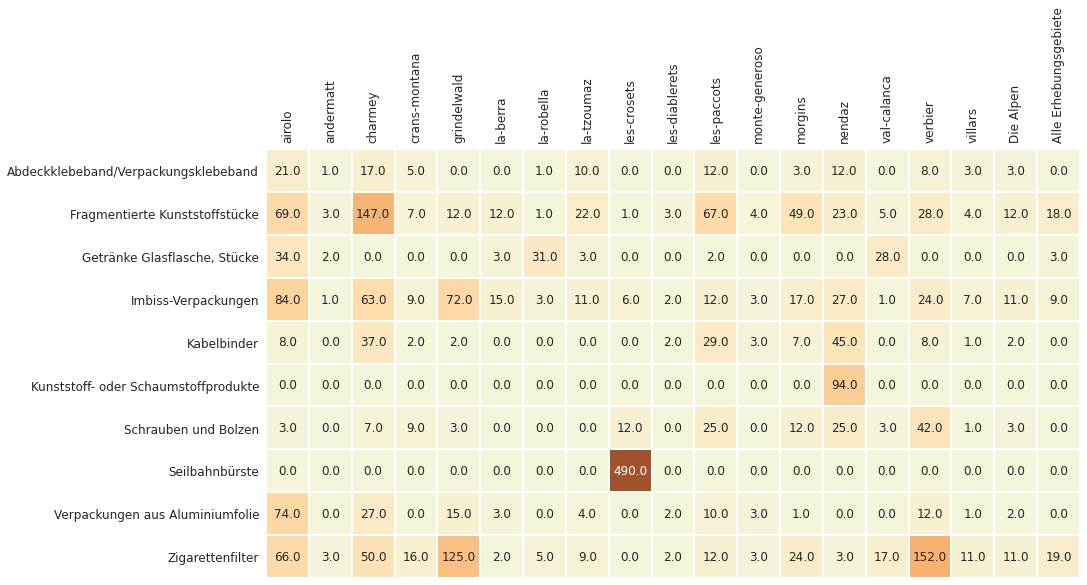

In [13]:
# aggregated survey totals for the most common codes for all the water features 
m_common_st = wt_data[wt_data.code.isin(m_common.index)].groupby(["location", "loc_date","code"], as_index=False).agg(agg_pcs_quantity)
m_common_ft = m_common_st.groupby(["location", "code"], as_index=False)[unit_label].median()

# map the desctiption to the code
m_common_ft["item"] = m_common_ft.code.map(lambda x: code_description_map.loc[x])

# pivot that
m_c_p = m_common_ft[["item", unit_label, "location"]].pivot(columns="location", index="item")

# quash the hierarchal column index
m_c_p.columns = m_c_p.columns.get_level_values(1)

# the aggregated totals for the survey area
m_c_p[level_names[0]]= sut.aggregate_to_code(wt_data[wt_data.code.isin(m_common.index)], code_description_map,name=level_names[0])

# a_s_a = a_data[(a_data["date"] >= start_date)&(a_data["date"] <= end_date)&(a_data.code.isin(m_common.index))].groupby(["water_name_slug", "loc_date", "code"], as_index=False).agg(agg_pcs_quantity)
m_c_p[level_names[1]] = sut.aggregate_to_code(a_data[a_data.code.isin(m_common.index)], code_description_map,name=level_names[1])

# chart that
fig, ax  = plt.subplots(figsize=(len(m_c_p.columns)*.8,len(m_c_p)*.9))

axone = ax
sns.heatmap(m_c_p, ax=axone,  annot=True,vmax=300, annot_kws={"fontsize":12}, cmap=cmap2, fmt=".1f", square=True, cbar=False, linewidth=.1, linecolor="white")

axone.set_xlabel("")
axone.set_ylabel("")

axone.tick_params(labelsize=12, which="both", axis="both", labeltop=True, labelbottom=False)
plt.setp(axone.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.close()

*__Unten:__ Seilbahnbürste/Kabinenbürsten, die verwendet werden, um Eis und Schnee von Skiliften zu entfernen, können sich von der Anlage lösen und Tausende von schweren Kunststofffäden erzeugen.*

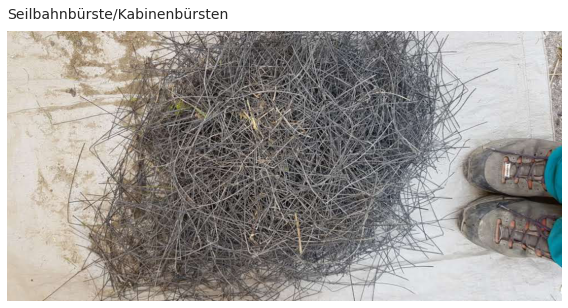

In [14]:
teamv = PILImage.open("resources/images/alpes_valaisanne/veysonnaz_brosse.jpg")

# display images
fig, ax = plt.subplots(figsize=(8,4.5))

axone=ax
sut.hide_spines_ticks_grids(axone)
axone.imshow(teamv);
axone.set_title("Seilbahnbürste/Kabinenbürsten", **ck.title_k14)

plt.tight_layout()
plt.show()

## Nutzen der gefundenen Objekte 

Die Nutzungsart basiert auf der Verwendung des Objekts, bevor es weggeworfen wurde, oder auf der Artikelbeschreibung, wenn die ursprüngliche Verwendung unbestimmt ist. Identifizierte Objekte werden in eine der vordefinierten Kategorien eingeordnet. Die Kategorien werden je nach Verwendung oder Artikelbeschreibung gruppiert.

*  **Abwasser:** Gegenstände, die aus Kläranlagen freigesetzt werden, einschließlich Gegenstände, die wahrscheinlich über die Toilette entsorgt werden   
*  **Mikroplastik (< 5 mm):** zersplitterte Kunststoffe und Kunststoffharze aus der Vorproduktion
*  **Infrastruktur:** Artikel im Zusammenhang mit dem Bau und der Instandhaltung von Gebäuden, Straßen und der Wasser-/Stromversorgung  
*  **Essen und Trinken:** alle Materialien, die mit dem Konsum von Essen und Trinken in Zusammenhang stehen
*  **Landwirtschaft:** vor allem Industriefolien, z. B. für Mulch und 
*  **Tabak:** hauptsächlich Zigarettenfilter, einschließlich aller mit dem Rauchen verbundenen Materialien 
*  **Freizeit und Erholung:** Objekte, die mit Sport und Freizeit zu tun haben, z. B. Angeln, Jagen, Wandern usw. 
*  **Verpackungen außer Lebensmittel und Getränke:** Verpackungsmaterial, das nicht als lebensmittel-, getränke- oder tabakbezogen gekennzeichnet ist
*  **Plastikfragmente:** Plastikteile unbestimmter Herkunft oder Verwendung  
*  **Persönliche Gegenstände:** Accessoires, Hygieneartikel und Kleidung 

Im Anhang finden Sie die vollständige Liste der identifizierten Objekte, einschließlich Beschreibungen und Gruppenklassifizierung. Der Abschnitt [Codegruppen](codegroups) beschreibt jede Codegruppe im Detail und bietet eine umfassende Liste aller Objekte in einer Gruppe.

*__Unten:__ Wanderwege Nutzen der gefundenen Objekte: % der Gesamtzahl nach Wassermerkmal. Fragmentierte Objekte, die nicht eindeutig identifiziert werden können, bleiben nach Größe klassifiziert.*  

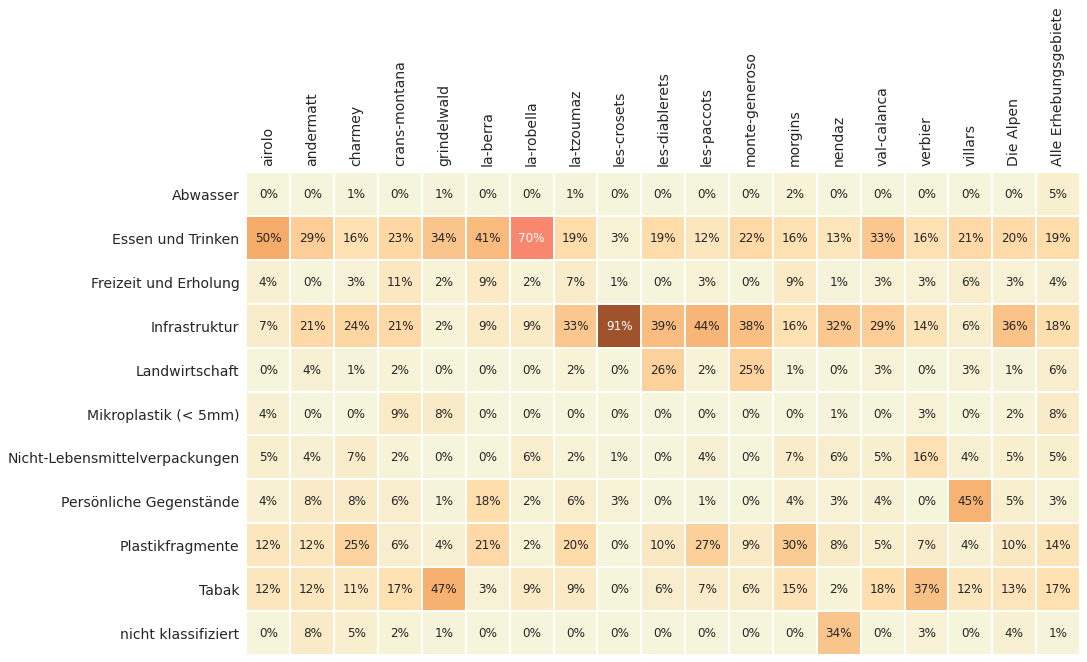

In [15]:
# the median survey total and % of total for codegroups
cg_t = wt_data.groupby(["loc_date", "location","groupname"], as_index=False).agg(agg_pcs_quantity)

# aggregate all that for each water feature
cg_t = cg_t.groupby(["location", "groupname"], as_index=False).agg({unit_label:"median", "quantity":"sum"})

# quantity per water feature
cg_tq = cg_t.groupby("location").quantity.sum()

# assign the water feature total to each record
for a_feature in cg_tq.index:
    cg_t.loc[cg_t.location == a_feature, "f_total"] = cg_tq.loc[a_feature]

# get the percent of total for each group for each water feature
cg_t["pt"] = (cg_t.quantity/cg_t.f_total).round(2)

# pivot that
data_table = cg_t.pivot(columns="location", index="groupname", values="pt")

# make a column for the survey area and all data
data_table[level_names[0]]= sut.aggregate_to_group_name(wt_data,name=level_names[0])
data_table[level_names[1]]= sut.aggregate_to_group_name(sd, name=level_names[1])

# chart that
fig, ax = plt.subplots(figsize=(len(data_table.columns)*.8,len(data_table)*.9))

axone = ax
sns.heatmap(data_table , ax=axone, cmap=cmap2, annot=True, annot_kws={"fontsize":12}, cbar=False, fmt=".0%", linewidth=.1, square=True, linecolor="white")

axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=True, labelbottom=False)
axone.set_xlabel("")
plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.tight_layout()
plt.show()

In [16]:
# median p/50m solve cg_t for unit_label
data_table = cg_t.pivot(columns="location", index="groupname", values=unit_label)

# survey area median
data_table[level_names[0]] = sut.aggregate_to_group_name(fd, name=level_names[0], val="med")

# all survey area median
data_table[level_names[1]] = sut.aggregate_to_group_name(sd, unit_label=unit_label, name=level_names[1], val="med" )

*__Unten:__ Wanderwege Nutzen der gefundenen Objekte: Median p/100m.*

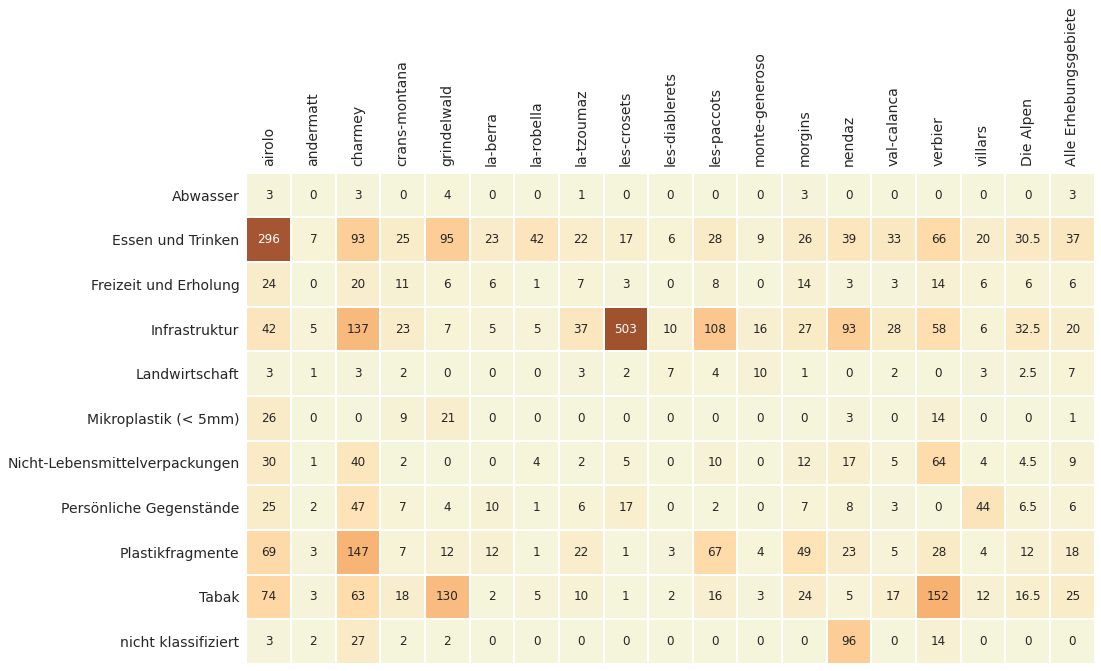

In [17]:
fig, ax = plt.subplots(figsize=(len(data_table.columns)*.8,len(data_table)*.9))

axone = ax
sns.heatmap(data_table , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt="g", cbar=False, linewidth=.1, square=True, linecolor="white")

axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=True, labelbottom=False)

axone.set_xlabel("")
plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

### Perzentil-Rangfolge der Umfrageergebnisse in Bezug auf die Flächennutzung

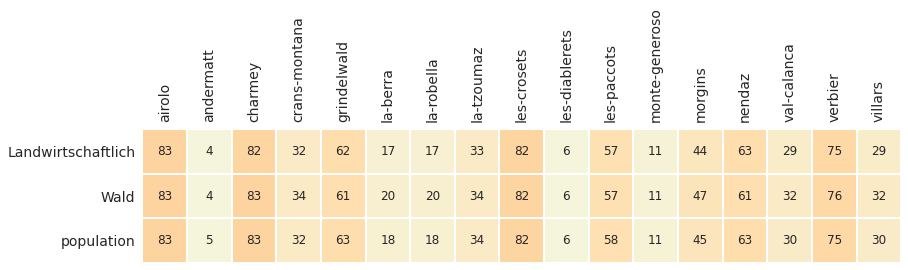

In [18]:
# get the percentile ranking under each condition:
# define land use ranges based on the sample data
l_f = ["% zu ag", "% zu Wald", "population"]

this_range = (fd[l_f[0]].min(), fd[l_f[0]].max())
this_range_w = (fd[l_f[1]].min(), fd[l_f[1]].max())
this_range_p = (fd[l_f[2]].min(), fd[l_f[2]].max())

# apply them to all the data
# one test for agg -- a dominant land use feature of the sample data
some_data = a_data[(a_data[l_f[0]] >= this_range[0])&(a_data[l_f[0]] <= this_range[1])].copy()

# one test for woods -- the dominant land use feature of the sample data
some_data_w = a_data[(a_data[l_f[1]] >= this_range_w[0])&(a_data[l_f[1]] <= this_range_w[1])].copy()

# one test for population -- 
some_data_p = a_data[(a_data[l_f[2]] >= this_range_p[0])&(a_data[l_f[2]] <= this_range_p[1])].copy()

# remove Alps valaisannes
some_data = some_data[~some_data.location.isin(fd.location.unique())].copy()
some_data_w = some_data_w[~some_data_w.location.isin(fd.location.unique())].copy()
some_data_p = some_data_p[~some_data_p.location.isin(fd.location.unique())].copy()

# the number of samples and locations that have similar land use profiles as AV:
# agg to loc_date for each criteria
# data for charting and comparing
data=some_data.groupby(["loc_date","location",l_f[0]], as_index=False)[unit_label].sum()
data_w =some_data_w.groupby(["loc_date","location",l_f[1]], as_index=False)[unit_label].sum()
data_p = some_data_p.groupby(["loc_date","location",*l_f[1:]], as_index=False)[unit_label].sum()

# get the percentile ranking for each location under each condtion:
table_data = {}
for i,x in enumerate(nvsn):
    this_num = wt_dt.loc[wt_dt.location == x, unit_label].values[0]
    a = (stats.percentileofscore(data[unit_label].to_numpy(), this_num))
    b = (stats.percentileofscore(data_p[unit_label].to_numpy(), this_num))
    c = (stats.percentileofscore(data_w[unit_label].to_numpy(), this_num))
    table_data.update({x:{"Landwirtschaftlich":a, "Wald":b, "population":c}})

# make df and format
t_data = pd.DataFrame(table_data)
t_data = t_data.astype("int")
t_data.reset_index(inplace=True)
t_data.rename(columns={"index":"variable"}, inplace=True)
t_data.set_index("variable", inplace=True, drop=True)

fig, ax = plt.subplots(figsize=(len(nvsn)*.8,5))

axone = ax
sns.heatmap(t_data , ax=axone, cmap=cmap2, vmax=300, annot=True, annot_kws={"fontsize":12}, fmt="g", cbar=False, linewidth=.1, square=True, linecolor="white")

axone.set_ylabel("")
axone.tick_params(labelsize=14, which="both", axis="both", labeltop=True, labelbottom=False)

plt.setp(axone.get_xticklabels(), rotation=90, fontsize=14)
plt.setp(axone.get_yticklabels(), rotation=0, fontsize=14)

plt.show()

*__Oben:__ Die Rangfolge der untersuchten Alpe-Standorte in Bezug auf die Landnutzung.  Die Ergebnisse der Erhebung in Airolo waren zum Beispiel höher als 83 % aller Erhebungen (Seen, Flüsse und Alpen). In Andermatt liegen die Erhebungsergebnisse unter 95 % aller Erhebungen mit einem vergleichbaren Landnutzungsprofil.*

## Diskussion

### Ergebnisse der Alpenerhebung im Vergleich zu Erhebungen an der Küste

Der Medianwert beträgt 110 p/100m für die 17 Standorte, die die Kriterien für Länge und Breite im Erhebungsgebiet Alpen erfüllen, und liegt damit unter dem Medianwert aller anderen Erhebungsgebiete (189 p/100m). Objekte, die mit dem Konsum von Nahrungsmitteln, Getränken und Tabak in Verbindung stehen, machten einen geringeren Prozentsatz der Gesamtzahl aus und wiesen eine niedrigere p/100m-Rate auf als Standorte entlang von Wassersystemen. Dieser Unterschied könnte zum Teil auf die geringe Verstädterung zurückzuführen sein, die das Erhebungsgebiet Alpen im Vergleich zu allen anderen Erhebungsgebieten kennzeichnet. 

Der Anteil von Objekten, die mit der Infrastruktur zusammenhängen, ist mit 36 % doppelt so hoch wie in allen Untersuchungsgebieten zusammen. Dies ist größtenteils auf die Fäden von Skiliftbürsten zurückzuführen, die in Les-Crosets in großen Mengen gefunden wurden. Skiliftbürsten werden verwendet, um den Schnee von der Oberseite der abgedeckten Skilift-Sessel zu entfernen, wenn diese sich dem Einstiegsort nähern. Ähnlich wie Industriepellets oder Schaumstoffkügelchen in der aquatischen Umwelt werden Teile von Skibürsten wahrscheinlich immer wieder in gelegentlich großen Mengen an ganz bestimmten Orten gefunden.

Das Verhältnis von Infrastrukturobjekten zu Lebensmitteln und Tabakwaren ist fast 1. Solche Ergebnisse sind typisch für Umgebungen mit einer besser entwickelten Infrastruktur, siehe [Gemeinsame Verantwortung] (Verkehr). Fragmentierte Kunststoffe werden in ähnlichem Umfang wie in den anderen Untersuchungsgebieten gefunden. Neu auf der Liste der häufigsten Gegenstände sind Kabelbinder und Abdeckband. Beide Gegenstände werden an der Küste gefunden, allerdings mit einer Häufigkeit von unter 50 %.

Es sei daran erinnert, dass diese Umfragen entlang der Skiliftlinie oder eines Wanderweges in einem Skigebiet durchgeführt wurden.  Auch wenn die Nutzung im Winter größer sein mag, sind viele Gebiete hervorragende Vett- und Wandergebiete, so dass eine ganzjährige Nutzung dieser Regionen möglich ist. 

#### Die häufigsten Objekte

Die am häufigsten vorkommenden Gegenstände machen 74% der insgesamt gefundenen aus. Die Zigarettenstummel lagen im Erhebungsgebiet Alpes nicht über dem nationalen Median, allerdings wurden in Verbier, Grindelwald und Airolo signifikante Werte festgestellt. Spezifische Gegenstände aus der Gruppe der Infrastruktur sind vertreten, wie z.B.:  

1. Schrauben und Bolzen 
2. Kabelbinder
3. Abdeckband
4. Ziegelsteine und Rohre

Das Fehlen von expandiertem oder extrudiertem Polystyrol in der Liste der am häufigsten vorkommenden Produkte in den Erhebungsgebieten der Alpen steht jedoch in scharfem Kontrast zu allen anderen Erhebungsgebieten, in denen dieses Produkt allein etwa 13% der Gesamtmenge ausmacht, siehe [_Seen und Flüsse_](allsurveys).

### Implementierung von Datenerhebungen über Abfallobjekte in das bestehende Geschäftsmodell 

Im Vergleich zu einer Strand-Abfallaufkommen Untersuchung deckt eine Aufräumaktion ein relativ großes geographisches Gebiet ab. Freiwillige, die an diesen Veranstaltungen teilnehmen, werden von der Möglichkeit angezogen, sich um die Umwelt zu kümmern UND sich in der Gesellschaft anderer mäßig zu bewegen. Datenerhebungen zu Strand-Abfallobjekten bieten nicht dasselbe Aktivitätsniveau und sind möglicherweise nicht für alle Freiwilligen von Interesse.  

Die Durchführung von Strand-Abfallobjekten bedeutet, dass Sie Freiwilligen die Möglichkeit geben, vor Ort Erfahrungen zu sammeln, aber auch intern die Ressourcen bereitstellen, um sicherzustellen, dass die Untersuchung gemäß dem Protokoll durchgeführt wird. Dazu gehört das Identifizieren, Zählen und Eingeben von Daten. Die Summit Foundation war in der Lage, dies zu tun, indem sie dafür sorgte, dass bei jeder Veranstaltung eine Person anwesend war, die die Umfrage durchführen konnte. 

Die Personen, die die Datenerhebung ausführten, zogen es vor, die Proben entlang der Liftlinien zu nehmen und bei der Ankunft und Abfahrt der Skilifte zu beginnen. Die auf diese Weise entnommenen Proben folgen dem Verlauf der Veranstaltung: bergab und in den Bereichen mit hohem Verkehrsaufkommen.  

Proben, die in der Nähe von Gebäuden oder anderen Einrichtungen genommen wurden, ergaben höhere Datenerhebungen Ergebnisse. Damit bestätigte sich, was die Mitglieder der Summit Foundation in den vergangenen Jahren festgestellt hatten. Aus diesen Erfahrungen erklärte der Projektleiter, Téo Gürsoy:  

> Die Personen, die die Datenerhebung ausführt, konzentrieren sich nämlich hauptsächlich auf die Abschnitte unter den Sesselliften, Gondeln oder bei der Abfahrt und Ankunft dieser Anlagen, die stark frequentierte Orte sind.     Die Personen, die die Datenerhebung ausführt, konzentrieren sich nämlich hauptsächlich auf die Abschnitte unter den Sesselliften, Gondeln oder bei der Abfahrt und Ankunft dieser Anlagen, die stark frequentierte Orte sind. 

In einigen Fällen ist die Dichte der Objekte so groß, dass sich die Person, welche die Datenerhebung ausführt, gezwungen sah, sich auf einen Bereich zu konzentrieren, indem sie die Breite des Erfassungsbereichs vergrößerte. M. Gursoy beschrieb, was passierte, als eine Person, welche die Datenerhebung ausführt, auf einen Ort stieß, der große Mengen von Skiliftbürsten enthielt: 

> Die Person, welche die Datenerhebung ausführt, begann den Streckenabschnitt jedoch an der Ankunftsstation der Gondel. Die Skiliftbürsten erregten schnell die Aufmerksamkeit der Person, die beschloss, sich nur auf diesen Bereich zu konzentrieren, um herauszufinden, wie viele von ihnen in dieser Art von Gebiet zu finden waren...

Die Datenerhebungen Ergebnisse rund um Infrastruktur oder Gebäude sind kein Indikator für den Zustand der Umwelt im gesamten Gebiet. Datenerhebungen in der Umgebung dieser Strukturen weisen tendenziell höhere Werte auf, machen aber nur einen kleinen Teil der gesamten Landnutzung aus. 

Es mussten Anpassungen an der Software und dem Berichtsschema vorgenommen werden, um die verschiedenen Arten von Daten zu verarbeiten, die bei Aufräumarbeiten anfallen. Dazu gehörte auch die Schaffung neuer Identifikationscodes für bestimmte Objekte, die im Untersuchungsgebiet der Alpen gefunden werden. Außerdem stellte die Summit Foundation die Ressourcen zur Verfügung, damit ein Mitarbeiter der Stiftung in der Anwendung des Projektprotokolls und der Software geschult werden konnte. 

### Schlussfolgerungen

Die Datenerhebungen, die entlang der Wege und Liftlinien im Untersuchungsgebiet der Alpen durchgeführt wurden, ergaben Daten, die den Daten der Erhebungen an der Küste sehr ähnlich waren. Wenn sich die Personen, die die Datenerhebungen durchgeführt haben, jedoch auf bestimmte Infrastruktureinrichtungen konzentrierten, wurden extreme Werte ermittelt. Die Datenerhebungen an der Küste würden zu den gleichen Ergebnissen führen, wenn die Erhebungen nur an Orten durchgeführt würden, an denen hohe Abfallobjekte wahrscheinlicher sind.  

Objekte aus dem Bereich Essen und Trinken machen nur 11% der insgesamt gefundenen Objekte aus, verglichen mit 36% in den anderen Untersuchungsgebieten. Der Anteil an Infrastrukturobjekten beträgt in den Alpen jedoch 75% gegenüber 18% in allen anderen Untersuchungsgebieten. Dies ist zum Teil auf den Unterschied in der menschlichen Präsenz im Vergleich zu Orten in niedrigeren Höhenlagen zurückzuführen, wo die menschliche Präsenz das ganze Jahr über konstant ist, so dass der Druck durch Nahrungs- und Genussmittel im Gegensatz zur Infrastruktur größer ist. 

Dieses erste Projekt hat auch gezeigt, dass es möglich ist, die Überwachung mit beliebten Veranstaltungen zu kombinieren. In Vorbereitung auf die Überwachung tauschten die Mitglieder beider Teams Ideen aus und sortierten gemeinsam Proben. Dies ermöglichte es beiden Organisationen, sich gegenseitig besser zu verstehen und Basisleistungen zu bestimmen, die bei der Datenerfassung für einen nationalen Bericht erbracht werden konnten:  

1. Helfen Sie bei der Erfassung und Identifizierung
2. Assistieren Sie bei der Dateneingabe
3. Stellen Sie Diagramme, Grafiken und Daten zur Verfügung, die von den teilnehmenden Organisationen verwendet werden können.

Eine Strand-Abfallaufkommen Untersuchung dauert 2-4 Stunden, je nachdem wie viele verschiedene Objekte es gibt. Diese Ressourcen waren im Betriebsbudget der beiden Organisationen nicht vorgesehen. Daher stellte die Summit Foundation die Koordination und Infrastruktur zur Verfügung und Hammerdirt stellte eine zusätzliche Person, die die Datenerhebung ausführt, sowie IT-Unterstützung.  

Die zur Verfügung gestellten Daten ermöglichen direkte Vergleiche zwischen den Orten, vorausgesetzt, es wird die gleiche Erhebungsmethode verwendet. Die Häufigkeit von Infrastrukturartikeln im Verhältnis zu Lebensmitteln und Tabakwaren ist ein Hinweis auf Datenerhebungen in ländlichen Gebieten. Wie gut diese Daten mit Datenerhebungen an der Küste vergleichbar sind, muss noch weiter untersucht werden. Zigarettenstummel, Glasscherben, Plastiksplitter und Snackverpackungen gehören jedoch zu den häufigsten Gegenständen, die an der Küste gefunden werden. 

Wir danken allen Mitgliedern der Summit Foundation für ihre Hilfe, insbesondere Olivier Kressmann und Téo Gürsoy. 

## Anhang

### Schaumstoffe und Kunststoffe nach Größe 

Die folgende Tabelle enthält die Komponenten "Gfoam" und "Gfrags", die für die Analyse gruppiert wurden. Objekte, die als Schaumstoffe gekennzeichnet sind, werden als Gfoam gruppiert und umfassen alle geschäumten Polystyrol-Kunststoffe > 0,5 cm.  Kunststoffteile und Objekte aus kombinierten Kunststoff- und Schaumstoffmaterialien > 0,5 cm werden für die Analyse als Gfrags gruppiert. 

*__Unten:__ fragmentierte Schaumstoffe und Kunststoffe nach Größengruppen. Median p/100m, Anzahl der Stücke, Prozent der Gesamtmenge.*

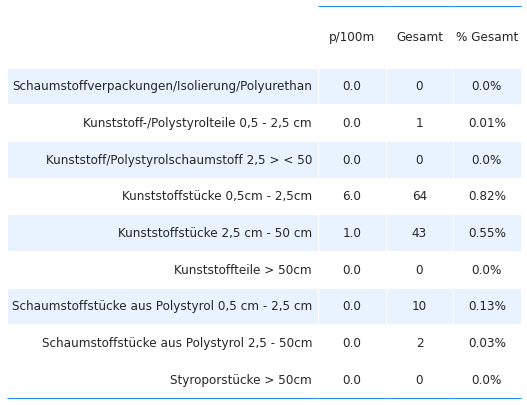

In [19]:
# collect the data before aggregating foams for all locations in the survye area
h=pd.read_csv("resources/checked_alpes_survey_data_be.csv")

# remove prefix
h["location"] = h["location"].map(lambda x: sut.get_rid_of_ix(x, prefix="clean-up-tour-"))

# remove prefixes from survey data
lAlps = h[h.river_bassin == bassin_name][["loc_date","code","location","river_bassin","groupname", "quantity", "pcs_m"]].copy()

# convert to reporting unit
lAlps[unit_label]= (lAlps.pcs_m*100).round(2)

# the fragmented plastics and foams
some_foams = ["G81", "G82", "G83", "G74"]
some_frag_plas = list(lAlps[lAlps.groupname == "plastic pieces"].code.unique())

# get just the foams and plastics and aggregate to code
conditions = ((lAlps.code.isin([*some_frag_plas, *some_foams]))&(~lAlps.location.isin(remove)))
fd_frags_foams = lAlps[conditions].groupby(["loc_date","code"], as_index=False).agg(agg_pcs_quantity)
fd_frags_foams = fd_frags_foams.groupby("code", as_index=False).agg(agg_pcs_median)

# add code description and format for printing
fd_frags_foams["item"] = fd_frags_foams.code.map(lambda x: code_description_map.loc[x])
fd_frags_foams["% of total"] = (fd_frags_foams.quantity/fd.quantity.sum()*100).round(2)
fd_frags_foams["% of total"] = fd_frags_foams["% of total"].map(lambda x: F"{x}%")
fd_frags_foams["quantity"] = fd_frags_foams["quantity"].map(lambda x: F"{x:,}")

# table data
data = fd_frags_foams[["item",unit_label, "quantity", "% of total"]].copy()
data.rename(columns={"quantity":"Gesamt", "% of total":"% Gesamt"}, inplace=True)

fig, axs = plt.subplots(figsize=(len(data.columns)*2.3,len(data)*.8))
sut.hide_spines_ticks_grids(axs)

this_table = sut.make_a_table(axs, data.values,  colLabels=data.columns, colWidths=[.6, .13, .13, .13], bbox=[0, 0, 1, 1])
this_table.get_celld()[(0,0)].get_text().set_text(" ")

plt.show()
plt.tight_layout()
plt.close()

### Landnutzungsprofil der Erhebungsorte

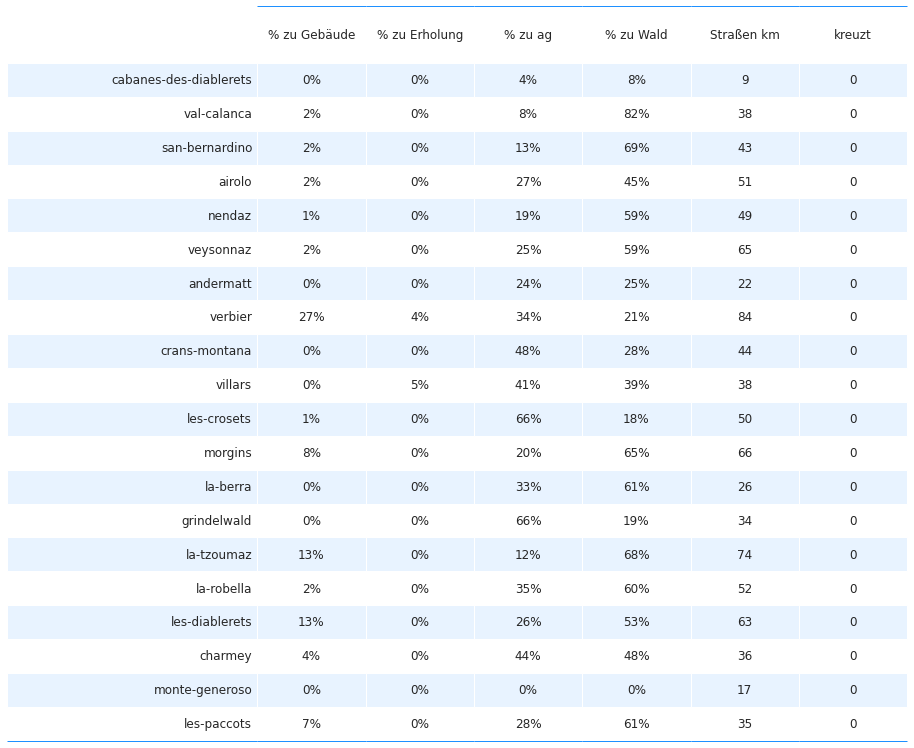

In [20]:
# get the land use profile of AV
lu_prof = fd[["location","% zu Gebäude", "% zu Erholung", "% zu ag", "% zu Wald", "Straßen km", "kreuzt"]].drop_duplicates()

# format for printing
lu_prof.loc[:,lu_prof.columns[1:-2]] = lu_prof.loc[:,lu_prof.columns[1:-2]].applymap(lambda x: F"{int((x*100))}%")
lu_prof.loc[:, lu_prof.columns[5:]] = lu_prof.loc[:, lu_prof.columns[5:]].applymap(lambda x: F"{int(x):,}")

# put that to a table
data=lu_prof.copy()

fig, axs = plt.subplots(figsize=(len(table_one.columns)*1.6,len(table_one)*.5))
sut.hide_spines_ticks_grids(axs)

this_table = sut.make_a_table(axs, data.values,  colLabels=data.columns, colWidths=[.3, *[.13]*6], bbox=[0, 0, 1, 1])
this_table.get_celld()[(0,0)].get_text().set_text(" ")

plt.tight_layout()
plt.show()

### Les Alps in Bezug auf die Landnutzung

Die Ergebnisse aus den Alpen werden mit den anderen Erhebungsergebnissen verglichen, die entweder % bis Wald oder % bis agg innerhalb der gleichen Spanne wie AV liegen. Die Bereiche für AV sind:

* \% zu ag: 0 to 66\%
* \% zu Wald: 0 to 83\%
* population: 199 to 10,668

In [21]:
# define land use ranges based on the sample data
this_range = (fd[l_f[0]].min(), fd[l_f[0]].max())
this_range_w = (fd[l_f[1]].min(), fd[l_f[1]].max())
this_range_p = (fd[l_f[2]].min(), fd[l_f[2]].max())

# apply them to all the data
# one test for agg -- a dominant land use feature of the sample data
some_data = a_data[(a_data[l_f[0]] >= this_range[0])&(a_data[l_f[0]] <= this_range[1])].copy()

# one test for woods -- the dominant land use feature of the sample data
some_data_w = a_data[(a_data[l_f[1]] >= this_range_w[0])&(a_data[l_f[1]] <= this_range_w[1])].copy()

# one test for population -- 
some_data_p = a_data[(a_data[l_f[2]] >= this_range_p[0])&(a_data[l_f[2]] <= this_range_p[1])].copy()

# remove Alps valaisannes
some_data = some_data[~some_data.location.isin(fd.location.unique())].copy()
some_data_w = some_data_w[~some_data_w.location.isin(fd.location.unique())].copy()
some_data_p = some_data_p[~some_data_p.location.isin(fd.location.unique())].copy()

# the number of samples and locations that have similar land use profiles as AV:
# agg to loc_date for each criteria
# data for charting and comparing
data=some_data.groupby(["loc_date","location",l_f[0]], as_index=False)[unit_label].sum()
data_w =some_data_w.groupby(["loc_date","location", l_f[1]], as_index=False)[unit_label].sum()
data_p = some_data_p.groupby(["loc_date","location",l_f[1], "population"], as_index=False)[unit_label].sum()
regional = fd.groupby(["loc_date","location", *l_f], as_index=False)[unit_label].sum()

# locations that share the characteristics
commonsamps = set(data.loc_date.unique()) & set(data_w.loc_date.unique())& set(data_p.loc_date.unique())
commonlocs = set(data.location.unique()) & set(data_w.location.unique())&set(data_p.location.unique())

# print these out to get the comparison

# print("agg")
# print(this_range)
# print(len(data.location.unique()))
# print(data.loc_date.nunique())
# print("woods")
# print(this_range_w)
# print(len(data_w.location.unique()))
# print(data_w.loc_date.nunique())
# print("p")
# print(this_range_p)
# print(len(data_p.location.unique()))
# print(data_p.loc_date.nunique())
# print(len(commonsamps))
# print(commonlocs)

# make a categorical df for mapping
mat_agg = dfBeaches.loc[data.location.unique()]
mat_agg["match"] = "agg"
mat_w = dfBeaches.loc[data_w.location.unique()]
mat_w["match"] = "woods"
mat_p = dfBeaches.loc[data_p.location.unique()]
mat_p["match"]="pop"

# merge all that and export to .csv
landusemap = pd.concat([mat_agg, mat_w, mat_p], axis=0)
# landusemap.to_csv("output/Alps-valaisannes/lu_comparison.csv", index=False)

*__Oben links:__ Gesamtsumme der Erhebung in Bezug auf den %-Anteil an Agg, Bereich=(0%, 66%). __Oben rechts:__ Gesamtzahl der Erhebungen in Bezug auf den Waldanteil, Bereich=(0%, 65%). __Unten links:__ Gesamtzahl der Erhebungen in Bezug auf die Bevölkerung, Bereich=(199, 10.668)*

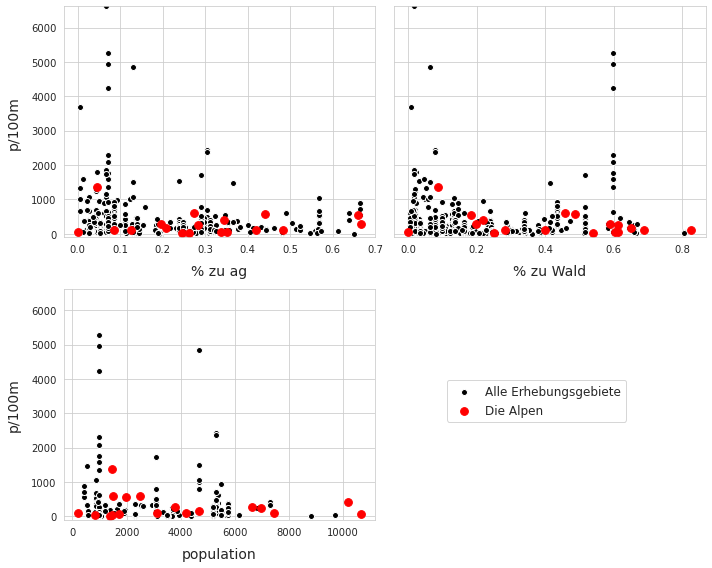

In [22]:
fig, axs = plt.subplots(2,2, figsize=(10,8), sharey=True)

axone=axs[0,0]
axtwo=axs[0,1]
axthree=axs[1,0]
axfour=axs[1,1]

# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data, x=l_f[0], y=unit_label, color="black", alpha=1, linewidth=1, label="All surveys", ax=axone, zorder=1)

# point estimates of the percentile ranking based off the edcf of all surveys
# place to store the rankings
rankings = {}

# plot the values for AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x][l_f[0]]
    axone.scatter(this_x, this_y, color="red", s=60, zorder=2)

# handle extreme values
axone.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axone.set_ylabel(unit_label, **ck.xlab_k14)
axone.set_xlabel(l_f[0], **ck.xlab_k14)

# gather up legend handles
axone.get_legend().remove()

# start axtwo
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_w, x=l_f[1], y=unit_label, color="black", alpha=1, linewidth=1, label="All surveys", ax=axtwo, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x][l_f[1]]
    rankings.update({x:(this_x, this_y)})
    axtwo.scatter(this_x, this_y, color="red", s=60, zorder=2)

# handle extreme values
axtwo.set_ylim(0, max(data[unit_label].to_numpy()))

# set labels
axtwo.set_ylabel(unit_label, **ck.xlab_k14)
axtwo.set_xlabel(l_f[1], **ck.xlab_k14)
axtwo.get_legend().remove()

# start axthree
# plot the samples from all the data that meet the x criteria
sns.scatterplot(data=data_p, x=l_f[2], y=unit_label, color="black", alpha=1, linewidth=1, label=level_names[1], ax=axthree, zorder=1)

# plot the values from AV
for x in regional.location.unique():
    this_y = regional[regional.location == x][unit_label]
    this_x = regional[regional.location == x][l_f[2]]
    rankings.update({x:(this_x, this_y)})
    axthree.scatter(this_x, this_y, color="red", s=60, label=level_names[0], zorder=2)

# handle extreme values
axthree.set_ylim(-100, max(data[unit_label].to_numpy()))

# start axfour,# clear axfour
sut.hide_spines_ticks_grids(axfour)

# set labels
axthree.set_ylabel(unit_label, **ck.xlab_k14)
axthree.set_xlabel(l_f[2], **ck.xlab_k14)
handles, labels = axthree.get_legend_handles_labels()
axthree.get_legend().remove()

fig.legend(handles[:2], labels[:2], bbox_to_anchor=(.75,.25), loc="lower center",  fontsize=12)
plt.tight_layout()
plt.show()

### Organisation und Durchführung

Summit foundation: Téo Gürsoy

Hammerdirt: Bettina Siegenthaler

__Die Erhebungsorte__

In [23]:
# display the survey locations
pd.set_option("display.max_rows", None)

disp_columns = ["latitude", "longitude", "city"]
disp_beaches = dfBeaches.loc[t["locations"]][disp_columns]
new_names = {"slug":"Standort", "city":"Stadt"}
disp_beaches.reset_index(inplace=True)
disp_beaches.rename(columns=new_names, inplace=True)
disp_beaches.set_index("Standort", inplace=True, drop=True)

disp_beaches

,latitude,longitude,Stadt
Standort,,,
cabanes-des-diablerets,46.338604,7.215525,Ormont-Dessus
val-calanca,46.330718,9.120103,Calanca
san-bernardino,46.445947,9.191344,Mesocco
airolo,46.514257,8.607884,Airolo
nendaz,46.162099,7.283486,Nendaz
veysonnaz,46.180334,7.366005,Nendaz
andermatt,46.618327,8.598803,Andermatt
verbier,46.103981,7.224760,Val de Bagnes
crans-montana,46.334214,7.479386,Lens


### Inventar der Objekte

In [24]:
pd.set_option("display.max_rows", None)
complete_inventory = code_totals[code_totals.quantity>0][["item", "utility", "quantity", "% of total","fail rate"]]

new_names = {"item":"Objekte", "groupname":"Gruppenname", "quantity":"Menge", "fail rate":"Fail-Pass", "% of total":"% Gesamt", }

complete_inventory.rename(columns=new_names, inplace=True)
complete_inventory.sort_values(by="Menge", ascending=False)

,Objekte,utility,Menge,% Gesamt,Fail-Pass
code,,,,,
G704,Seilbahnbürste,Infrastruktur,461,20.96,5
G27,Zigarettenfilter,Tabak,270,12.28,94
Gfrags,Fragmentierte Kunststoffstücke,Plastikfragmente,222,10.10,100
G30,Imbiss-Verpackungen,Essen und Trinken,187,8.50,100
G705,Schrauben und Bolzen,Infrastruktur,81,3.68,64
G93,Kabelbinder,Infrastruktur,73,3.32,64
G200,"Getränke Glasflasche, Stücke",Essen und Trinken,67,3.05,41
G177,Verpackungen aus Aluminiumfolie,Essen und Trinken,67,3.05,64
G124,Kunststoff- oder Schaumstoffprodukte,nicht klassifiziert,60,2.73,5
